<a href="https://colab.research.google.com/github/eodnjsdl21/Tutoring/blob/main/bitcoin_price_example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import FinanceDataReader as fdr

start_date = '2018-01-01'
end_date = '2023-03-03'

btc = fdr.DataReader('BTC/KRW', start_date, end_date)

print(btc.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-01  15047133.0  15046287.0  14026068.0  14548333.0  14548333.0   
2018-01-02  14514031.0  16400157.0  13990142.0  15918331.0  15918331.0   
2018-01-03  15914188.0  16565566.0  15788165.0  16172952.0  16172952.0   
2018-01-04  16247109.0  16707220.0  15433904.0  16552935.0  16552935.0   
2018-01-05  16423476.0  18802922.0  16131843.0  18510128.0  18510128.0   

                    Volume  
Date                        
2018-01-01  10962700800000  
2018-01-02  17899344238000  
2018-01-03  17950689456200  
2018-01-04  23115024576400  
2018-01-05  25319034814500  


In [ ]:
btc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,15047133.0,15046287.0,14026068.0,14548333.0,14548333.0,10962700800000
2018-01-02,14514031.0,16400157.0,13990142.0,15918331.0,15918331.0,17899344238000
2018-01-03,15914188.0,16565566.0,15788165.0,16172952.0,16172952.0,17950689456200
2018-01-04,16247109.0,16707220.0,15433904.0,16552935.0,16552935.0,23115024576400
2018-01-05,16423476.0,18802922.0,16131843.0,18510128.0,18510128.0,25319034814500
...,...,...,...,...,...,...
2023-02-27,30978950.0,31444266.0,30541950.0,31019684.0,31019684.0,29882818252455
2023-02-28,31018320.0,31092330.0,30533116.0,30600802.0,30600802.0,27147750459806
2023-03-01,30605530.0,31204412.0,30567020.0,30883694.0,30883694.0,32211027062696


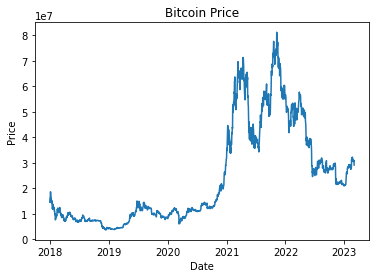

In [ ]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

start_date = '2018-01-01'
end_date = '2023-03-03'

btc = fdr.DataReader('BTC/KRW', start_date, end_date)

plt.plot(btc.index, btc['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price')
plt.show()

Epoch 1/100
23/23 [==============================] - 14s 81ms/step - loss: 0.0315 - val_loss: 0.0031
Epoch 2/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0047 - val_loss: 0.0022
Epoch 3/100
23/23 [==============================] - 0s 15ms/step - loss: 0.0035 - val_loss: 0.0013
Epoch 4/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 5/100
23/23 [==============================] - 0s 15ms/step - loss: 0.0029 - val_loss: 0.0011
Epoch 6/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0027 - val_loss: 0.0015
Epoch 7/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 8/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 9/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 10/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0023 - val_loss: 0.001

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

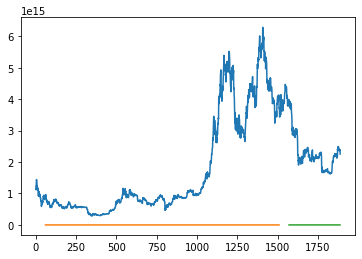

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 데이터 불러오기
start_date = '2018-01-01'
end_date = '2023-03-03'
btc = fdr.DataReader('BTC/KRW', start_date, end_date)

# 종가 데이터만 추출
btc_close = btc['Close'].values.reshape(-1,1)

# train/test 데이터 분리
train_size = int(len(btc_close) * 0.8)
test_size = len(btc_close) - train_size
train_data, test_data = btc_close[0:train_size,:], btc_close[train_size:len(btc_close),:]

# 데이터 스케일링
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# LSTM 입력 데이터 생성
def create_dataset(dataset, time_step=1):
    X_data, Y_data = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X_data.append(a)
        Y_data.append(dataset[i + time_step, 0])
    return np.array(X_data), np.array(Y_data)

time_step = 60 # LSTM 입력 시퀀스 길이
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=64, verbose=1)

# 예측 결과 추출
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 스케일링 역변환
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# train/test 데이터 비교 그래프 출력
train_predict_plot = np.empty_like(btc_close)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict)+time_step, :] = train_predict
test_predict_plot = np.empty_like(btc_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(time_step*2)+1:len(btc_close)-1, :] = test_predict
plt.plot(scaler.inverse_transform(btc_close))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.xlabel
